In [2]:
import tensorflow as tf
import os

In [3]:
# limiting the tensorflow gpu memory usage (to resolve OOM error)
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
import cv2
import  imghdr

In [5]:
data_dir = 'data'
img_exts = ['jpeg','jpg','bmp','png']

In [6]:
os.listdir(os.path.join(data_dir, "happy"))

['images26.jpg',
 'e162ccda8ce0f197f8863f327add9233.jpg',
 '05-12-21-happy-people.jpg',
 'GettyImages-871518740-1024x707.jpg',
 '7-principles-of-successful-and-happy-people.png',
 'how-happy-are-healthy-people.jpg',
 'physed-happiness-facebookJumbo.jpg',
 '170404-happy-workers-feature.jpg',
 'image18.jpeg',
 'MV5BMTM3ODM0NTQ1MF5BMl5BanBnXkFtZTcwMzAxMTM5OA._V1_.jpg',
 'images31.jpg',
 'Happy-people-raise-happy-kids-raise-yourself-first.jpg',
 'habits-that-define-very-happy-people.jpg',
 'goup-happy-people-group-jumping-isolated-white-background-35582232.jpg',
 '1902587.jpg',
 'o-HAPPY-facebook.jpg',
 '07-120104-happy_people_are_not_nice_people.jpg',
 'happy-people-13772392.jpg',
 'images30.jpg',
 'image15.jpeg',
 'young-and-happy-people-vector-15114154.jpg',
 'maxresdefault2.jpg',
 'bigstock-Portrait-Of-Smiling-Employees-272904928-min-scaled.jpg',
 'happy-people-1024x768.jpeg',
 '1902540.jpg',
 'hqdefault.jpg',
 'image19.jpeg',
 'images36.jpg',
 'images22.jpg',
 'tmp_6mv7xy_5d5b15258a50

In [7]:
print(len(os.listdir(os.path.join(data_dir, "happy"))))
print(len(os.listdir(os.path.join(data_dir, "sad"))))

101
69


In [8]:
for image_class in os.listdir(data_dir):
    print(image_class)

happy
.DS_Store
sad


In [9]:
for image_class in os.listdir(data_dir):
    if image_class==".DS_Store":
        pass
    else:
        for image in os.listdir(os.path.join(data_dir, image_class)):
            image_path = os.path.join(data_dir, image_class, image)
            try:
                # reading the image file
                img = cv2.imread(image_path)

                #getting the image extensrion
                tip = imghdr.what(image_path)

                #cheching if it exists
                if tip not in img_exts:
                    print("Image not in extensions list {}".format(image_path))
                    os.remove(image_path)
            except Exception as e:
                print("Issue with the image file {}".format(image_path))


In [10]:
tf.data.Dataset??


Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
class DatasetV2(
    collections_abc.Iterable,
    tracking_base.Trackable,
    composite_tensor.CompositeTensor,
    data_types.DatasetV2,
    metaclass=abc.ABCMeta):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dty

In [11]:
import numpy as np
import matplotlib.pyplot as plt


In [49]:
tf.keras.utils.image_dataset_from_directory??


Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)
Source:   
@keras_export(
    [
        "keras.utils.image_dataset_from_directory",
        "keras.preprocessing.image_dataset_from_directory",
    ]
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    ve

In [50]:
# loading the dataset using Dataset 
data = tf.keras.utils.image_dataset_from_directory('data')


Found 170 files belonging to 2 classes.


In [51]:
data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [52]:
data_iterator = data.as_numpy_iterator()


In [53]:
data_iterator

NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x36d33be80>)

In [54]:
batch = data_iterator.next()

In [55]:
batch

(array([[[[1.80609375e+02, 1.45921875e+02, 1.73906250e+01],
          [1.49125000e+02, 1.09578125e+02, 0.00000000e+00],
          [1.46984375e+02, 1.00828125e+02, 0.00000000e+00],
          ...,
          [1.21718750e+02, 9.64375000e+01, 2.83281250e+01],
          [1.28234375e+02, 9.88125000e+01, 7.15625000e+00],
          [1.51906250e+02, 1.20734375e+02, 6.96875000e+00]],
 
         [[1.82077271e+02, 1.46192871e+02, 1.85875244e+01],
          [1.53810974e+02, 1.13891479e+02, 1.67678833e+00],
          [1.52562378e+02, 1.05683472e+02, 3.87298584e+00],
          ...,
          [1.14334106e+02, 8.93633728e+01, 2.21290894e+01],
          [1.22266815e+02, 9.33699951e+01, 4.57049561e+00],
          [1.47321899e+02, 1.16635559e+02, 4.74996948e+00]],
 
         [[1.84410034e+02, 1.46623535e+02, 2.04896240e+01],
          [1.61257874e+02, 1.20746216e+02, 4.34152222e+00],
          [1.61426880e+02, 1.13399536e+02, 1.00278931e+01],
          ...,
          [1.02598511e+02, 7.81212463e+01, 1.2277

In [56]:
print(f"the batch length is :{len(batch)}")
print(f"no of elenment in a batch {len(batch[0])}")
print(f"the shape of each image is {batch[0].shape}")

the batch length is :2
no of elenment in a batch 32
the shape of each image is (32, 256, 256, 3)


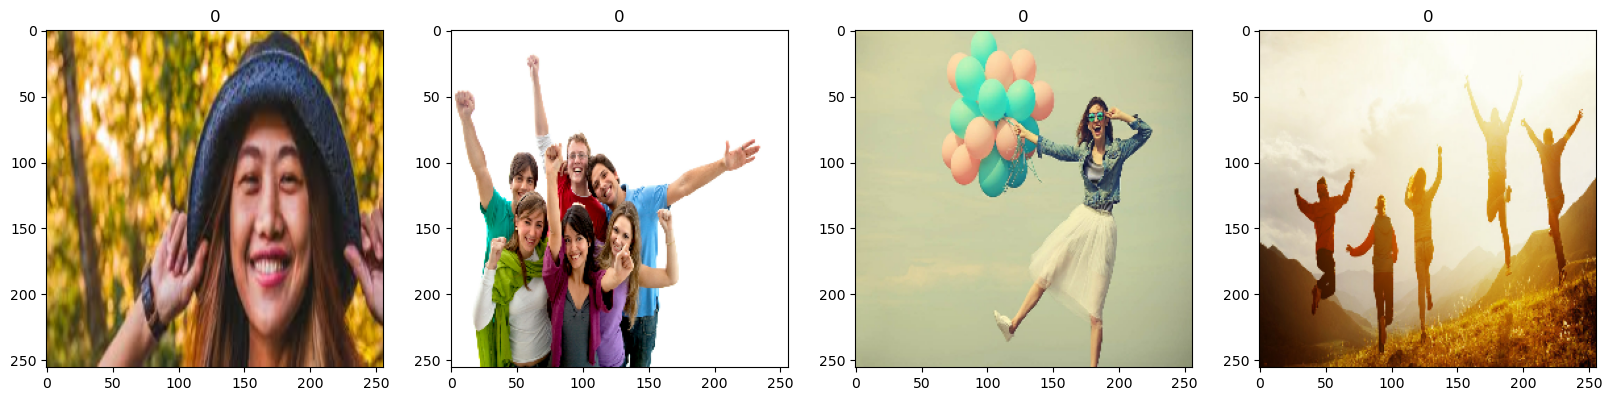

In [57]:
# class 1 = sad
# class 0 = happy
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 2 data preprocessing

In [58]:
data = data.map(lambda x,y:(x/255,y))


In [59]:
scaled_iterator = data.as_numpy_iterator()


In [60]:
batch = scaled_iterator.next()

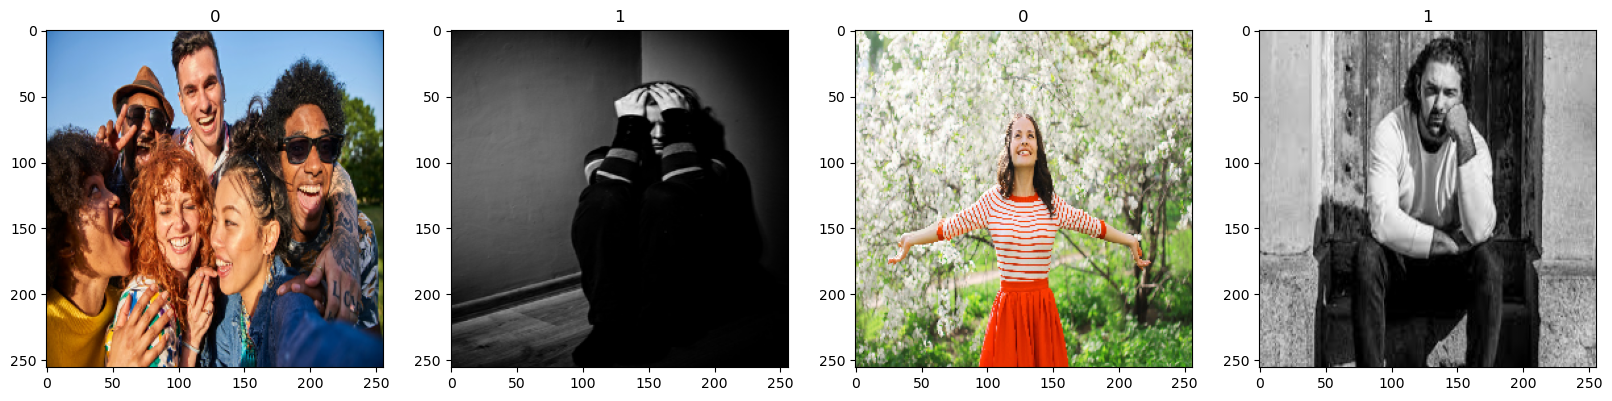

In [61]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

# 2.2)spliting the dataset

In [65]:
print(f"the total number of batches {len(data)}")

the total number of batches 6


In [68]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1
print(f"train_size : {train_size}")
print(f"val_size : {val_size}")
print(f"test_size : {test_size}")


train_size : 4
val_size : 1
test_size : 1


In [69]:
train = data.take(train_size)
val = data.take(val_size)
test = data.take(test_size)
print(f"train size : {len(train)}")
print(f"val size : {len(val)}")
print(f"test size : {len(test)}")

train size : 4
val size : 1
test size : 1
